## Logistic Regression using PyTorch 

### Hemant Thapa

### 1. Importing Libraries 

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

#### 2. Creating Random dataset 

In [2]:
# generate random dataset
X, y = make_classification(
    n_samples=100, 
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=2,     
)

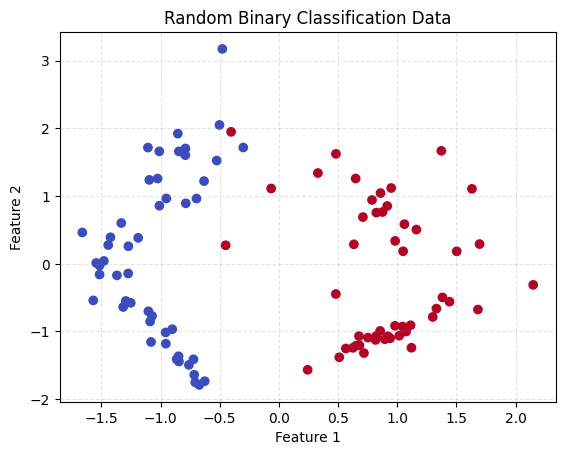

In [3]:
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random Binary Classification Data")
plt.grid(True, ls='--', alpha=0.2, color='grey')
plt.show()

#### 3. Feature Engineering 

In [4]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [6]:
X_train_tensor[:5]

tensor([[-0.7607, -1.4936],
        [ 1.3732,  1.6689],
        [-0.8645, -1.4092],
        [-0.7073, -1.7515],
        [-1.3691, -0.1711]])

In [7]:
y_train_tensor[:5]

tensor([0., 1., 0., 0., 0.])

In [8]:
# Checking dimension of train and test
print(f"{X_train_tensor.ndim} Dimensional, {y_train_tensor.ndim} Dimensional")
print(f"{X_test_tensor.ndim} Dimensional, {y_test_tensor.ndim} Dimensional")

2 Dimensional, 1 Dimensional
2 Dimensional, 1 Dimensional


In [9]:
# shape of train and test
X_train_tensor.shape, y_train_tensor.shape, X_test_tensor.shape, y_test_tensor.shape

(torch.Size([80, 2]), torch.Size([80]), torch.Size([20, 2]), torch.Size([20]))

#### 4. Creating Model for Classification 

In [10]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    # activation function
    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

#### 5. Training Model 

In [11]:
# input size
input_size = X_train.shape[1]
f'Number of Input: {input_size}'

'Number of Input: 2'

In [12]:
# creating an instance of LogisticRegression
model = LogisticRegression(input_size)
model

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [13]:
# binary Cross Entropy Loss
criterion = nn.BCELoss()

# learning rate
learning_rate = 0.01

# optimization algorithm for convergence
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# number of epochs
num_epochs = 10000

# lists to store training and test loss
train_loss_values = []
test_loss_values = []

for epoch in range(num_epochs):
    # forward pass and compute training loss
    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # backward and optimize
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_loss_values.append(train_loss.item())

    # compute test loss
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))
        test_loss_values.append(test_loss.item())

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [500/10000], Training Loss: 0.2663, Test Loss: 0.2165
Epoch [1000/10000], Training Loss: 0.1860, Test Loss: 0.1301
Epoch [1500/10000], Training Loss: 0.1517, Test Loss: 0.0938
Epoch [2000/10000], Training Loss: 0.1326, Test Loss: 0.0739
Epoch [2500/10000], Training Loss: 0.1203, Test Loss: 0.0613
Epoch [3000/10000], Training Loss: 0.1117, Test Loss: 0.0525
Epoch [3500/10000], Training Loss: 0.1053, Test Loss: 0.0461
Epoch [4000/10000], Training Loss: 0.1004, Test Loss: 0.0412
Epoch [4500/10000], Training Loss: 0.0964, Test Loss: 0.0374
Epoch [5000/10000], Training Loss: 0.0932, Test Loss: 0.0342
Epoch [5500/10000], Training Loss: 0.0905, Test Loss: 0.0317
Epoch [6000/10000], Training Loss: 0.0882, Test Loss: 0.0295
Epoch [6500/10000], Training Loss: 0.0862, Test Loss: 0.0276
Epoch [7000/10000], Training Loss: 0.0845, Test Loss: 0.0260
Epoch [7500/10000], Training Loss: 0.0830, Test Loss: 0.0246
Epoch [8000/10000], Training Loss: 0.0816, Test Loss: 0.0234
Epoch [8500/10000], Train

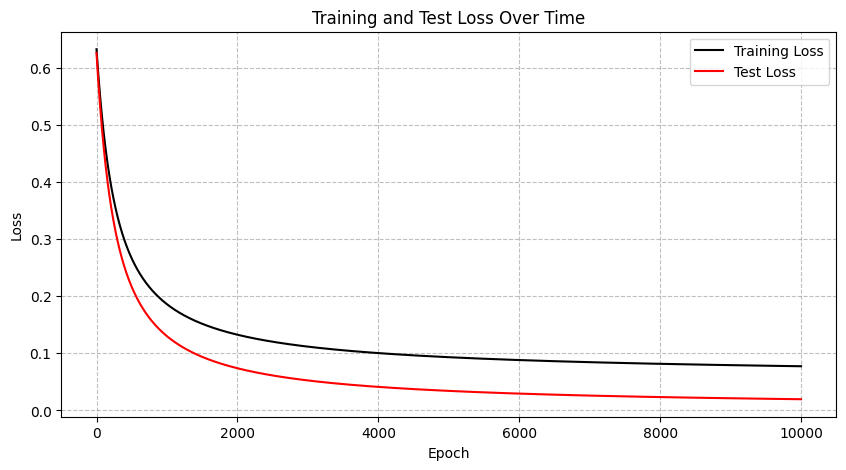

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss_values, label='Training Loss', color='black')
plt.plot(test_loss_values, label='Test Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

#### 5. Model Evaluation 

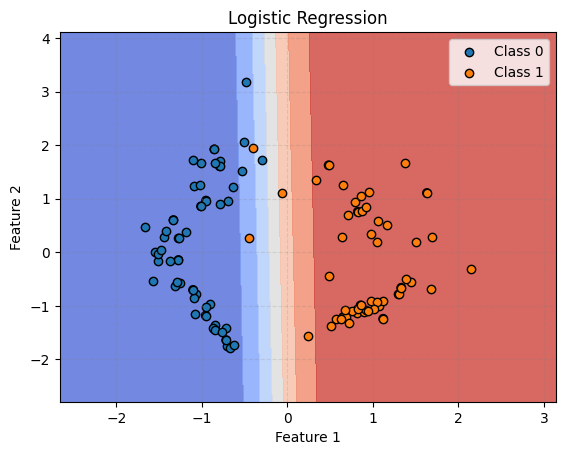

In [15]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='o')
# decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
# scatter plot
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression')
# labels on the plot
unique_classes = np.unique(y)
for class_label in unique_classes:
    class_indices = np.where(y == class_label)[0]
    plt.scatter(X[class_indices, 0], X[class_indices, 1], label=f'Class {int(class_label)}', edgecolors='k')
plt.legend()
plt.grid(True, ls='--', alpha=0.2, color='grey')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

In [17]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
    # evaluate on the train set
    with torch.no_grad():
        model.eval()
        train_outputs = model(X_train_tensor)
        train_predictions = (train_outputs >= 0.5).float().squeeze()
    # convert predictions
    y_train_pred = train_predictions.numpy()
    y_train_true = y_train
    # evaluation metrics for train set
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    train_precision = precision_score(y_train_true, y_train_pred)
    train_recall = recall_score(y_train_true, y_train_pred)
    train_f1 = f1_score(y_train_true, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
    # counts of true positives, true negatives, false positives, false negatives
    train_tp = train_conf_matrix[1, 1]
    train_tn = train_conf_matrix[0, 0]
    train_fp = train_conf_matrix[0, 1]
    train_fn = train_conf_matrix[1, 0]

    print('Train Set Evaluation:')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Train Precision: {train_precision:.4f}')
    print(f'Train Recall: {train_recall:.4f}')
    print(f'Train F1 Score: {train_f1:.4f}')
    print()
    print('Train Confusion Matrix:')
    print(train_conf_matrix)
    print()
    print(f'True Positives: {train_tp}')
    print(f'True Negatives: {train_tn}')
    print(f'False Positives: {train_fp}')
    print(f'False Negatives: {train_fn}')
    
    # evaluate on the test set
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test_tensor)
        test_predictions = (test_outputs >= 0.5).float().squeeze()
    # predictions for test set
    y_test_pred = test_predictions.numpy()
    y_test_true = y_test
    # evaluation metrics for test set
    test_accuracy = accuracy_score(y_test_true, y_test_pred)
    test_precision = precision_score(y_test_true, y_test_pred)
    test_recall = recall_score(y_test_true, y_test_pred)
    test_f1 = f1_score(y_test_true, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test_true, y_test_pred)
    # counts of true positives, true negatives, false positives, false negatives
    test_tp = test_conf_matrix[1, 1]
    test_tn = test_conf_matrix[0, 0]
    test_fp = test_conf_matrix[0, 1]
    test_fn = test_conf_matrix[1, 0]
    print('\nTest Set Evaluation:')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print()
    print('Test Confusion Matrix:')
    print(test_conf_matrix)
    print()
    print(f'True Positives: {test_tp}')
    print(f'True Negatives: {test_tn}')
    print(f'False Positives: {test_fp}')
    print(f'False Negatives: {test_fn}')

In [18]:
evaluate_model(model, X_train, y_train, X_test, y_test)

Train Set Evaluation:
Train Accuracy: 0.9750
Train Precision: 1.0000
Train Recall: 0.9500
Train F1 Score: 0.9744

Train Confusion Matrix:
[[40  0]
 [ 2 38]]

True Positives: 38
True Negatives: 40
False Positives: 0
False Negatives: 2

Test Set Evaluation:
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000

Test Confusion Matrix:
[[10  0]
 [ 0 10]]

True Positives: 10
True Negatives: 10
False Positives: 0
False Negatives: 0


In [19]:
def classification(model, X_train, y_train, X_test, y_test):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
    # train set
    with torch.no_grad():
        model.eval()
        train_outputs = model(X_train_tensor)
        train_predictions = (train_outputs >= 0.5).float().squeeze()
    # predictions
    y_train_pred = train_predictions.numpy()
    y_train_true = y_train
    # test set
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test_tensor)
        test_predictions = (test_outputs >= 0.5).float().squeeze()
    # predictions
    y_test_pred = test_predictions.numpy()
    y_test_true = y_test
    
    print('Train Set Classification Report:')
    print(classification_report(y_train_true, y_train_pred))
    print('\nTest Set Classification Report:')
    print(classification_report(y_test_true, y_test_pred))

In [20]:
classification(model, X_train, y_train, X_test, y_test)

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.95      0.97        40

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### 6. Cross Validation 

In [21]:
from sklearn.model_selection import KFold

In [22]:
def cross_validation(model, X, y, num_folds=5):
    # PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    
    # lists to store evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # k-fold cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # performing k-fold cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        # split data into train and test sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # train the model
        model.train()
        criterion = nn.BCELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        num_epochs = 200
        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = model(torch.tensor(X_train, dtype=torch.float32))
            loss = criterion(outputs, torch.tensor(y_train, dtype=torch.float32).view(-1, 1))
            loss.backward()
            optimizer.step()

        # evaluate the model on the test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(torch.tensor(X_test, dtype=torch.float32))
            test_predictions = (test_outputs >= 0.5).float().squeeze()
        y_test_pred = test_predictions.numpy()

        # compute evaluation metrics for this fold
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)

        # store evaluation metrics for this fold
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        
        print(f'Fold {fold}:')
        print(f'  Accuracy: {accuracy:.4f}')
        print(f'  Precision: {precision:.4f}')
        print(f'  Recall: {recall:.4f}')
        print(f'  F1 Score: {f1:.4f}')
        print()

    # average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    # average evaluation metrics
    print('Average Evaluation Metrics Across {} Folds:'.format(num_folds))
    print('  Average Accuracy: {:.4f}'.format(avg_accuracy))
    print('  Average Precision: {:.4f}'.format(avg_precision))
    print('  Average Recall: {:.4f}'.format(avg_recall))
    print('  Average F1 Score: {:.4f}'.format(avg_f1))

In [23]:
cross_validation(model, X, y, num_folds=5)

Fold 1:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Fold 2:
  Accuracy: 0.9500
  Precision: 1.0000
  Recall: 0.9000
  F1 Score: 0.9474

Fold 3:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Fold 4:
  Accuracy: 0.9500
  Precision: 1.0000
  Recall: 0.9000
  F1 Score: 0.9474

Fold 5:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Average Evaluation Metrics Across 5 Folds:
  Average Accuracy: 0.9800
  Average Precision: 1.0000
  Average Recall: 0.9600
  Average F1 Score: 0.9789


#### 7. ROC Curve 

In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
def plot_roc_curve(model, X_train, y_train, X_test, y_test):
    # train the model
    model.train()
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    num_epochs = 200
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(torch.tensor(X_train, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train, dtype=torch.float32).view(-1, 1))
        loss.backward()
        optimizer.step()

    # evaluate the model on train set
    model.eval()
    with torch.no_grad():
        train_outputs = model(torch.tensor(X_train, dtype=torch.float32))
        train_fpr, train_tpr, _ = roc_curve(y_train, train_outputs.numpy())
        train_roc_auc = auc(train_fpr, train_tpr)

    # ROC curve for train set
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {train_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Train ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True, ls='--', alpha=0.5, color='grey')

    # evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(torch.tensor(X_test, dtype=torch.float32))
        test_fpr, test_tpr, _ = roc_curve(y_test, test_outputs.numpy())
        test_roc_auc = auc(test_fpr, test_tpr)

    # ROC curve for test set
    plt.subplot(1, 2, 2)
    plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {test_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Test ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True, ls='--', alpha=0.5, color='grey')
    plt.tight_layout()
    plt.show()

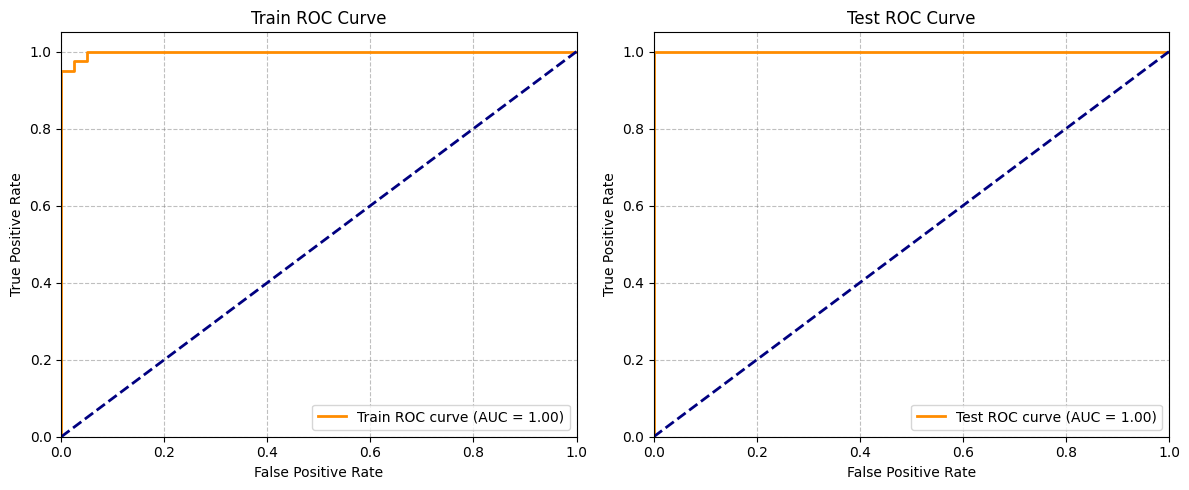

In [26]:
plot_roc_curve(model, X_train, y_train, X_test, y_test)

#### 8. Predictions 

In [27]:
def get_predictions(model, X):
    # set model to evaluation mode
    model.eval()
    
    # forward pass to obtain predicted probabilities
    with torch.no_grad():
        outputs = model(torch.tensor(X, dtype=torch.float32))
        probabilities = outputs.numpy()
    
    # convert probabilities to binary predictions
    binary_predictions = (probabilities >= 0.5).astype(int)
    
    return probabilities, binary_predictions

probabilities, binary_predictions = get_predictions(model, X_test)

In [28]:
print("Sample Predictions:")
for i in range(10): 
    print(f"Sample {i+1}: Probability={probabilities[i][0]:.4f}, Prediction={binary_predictions[i]}")

Sample Predictions:
Sample 1: Probability=0.9998, Prediction=[1]
Sample 2: Probability=0.0115, Prediction=[0]
Sample 3: Probability=0.0195, Prediction=[0]
Sample 4: Probability=0.9790, Prediction=[1]
Sample 5: Probability=0.9992, Prediction=[1]
Sample 6: Probability=0.9977, Prediction=[1]
Sample 7: Probability=0.0053, Prediction=[0]
Sample 8: Probability=0.9920, Prediction=[1]
Sample 9: Probability=0.0042, Prediction=[0]
Sample 10: Probability=0.9990, Prediction=[1]


#### References

- [PyTorch Official Website](https://pytorch.org/)
- [PyTorch GitHub Repository](https://github.com/pytorch/pytorch)
- [How to Apply K-Fold Averaging on Deep Learning Classifier](https://www.analyticsvidhya.com/blog/2021/09/how-to-apply-k-fold-averaging-on-deep-learning-classifier/): This article provides insights into using k-fold cross-validation for deep learning classifiers.
- [Logistic Regression with PyTorch](https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be): This article offers a guide to implementing logistic regression using PyTorch.
